In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio
import PIL
import scipy as sp
from scipy.stats import entropy as esp

def entropy(labels):
    prob_dict =np.zeros(256)
    for x in range(len(labels)):
        prob_dict[labels[x]]=prob_dict[labels[x]]+1
    entr=esp(prob_dict, base=2)
    return entr




2, 4, 192, 2, 0, 128, 132, 4, 2, 34, 34, 64, 10, 72, 146, 40, 164, 168, 146, 84, 170, 84, 170, 84, 170, 84, 172, 172, 170, 84, 238, 104, 4, 64, 164, 72, 168, 170, 84, 84, 144, 162, 36, 74, 180, 222, 244, 172, 170, 0, 40, 80, 170, 106, 84, 170, 72, 32, 0, 68, 8, 0, 132, 68, 18, 32, 4, 68, 42, 20, 0, 68, 146, 64, 8, 168, 64, 4, 2, 0, 72, 8, 4, 72, 20, 32, 18, 36, 170, 84, 164, 170, 84, 168, 170, 84, 218, 90, 218, 186, 238, 190, 254, 220, 252, 136, 2, 40, 170, 82, 84, 80, 164, 36, 138, 72, 150, 110, 180, 174, 250, 212, 170, 2, 4, 170, 86, 84, 212, 144, 168, 136, 0, 32, 18, 0, 40, 0, 0, 64, 8, 0, 32, 84, 136, 170, 36, 66, 160, 132, 80, 72, 8, 0, 16, 32, 146, 80, 68, 170, 84, 148, 84, 148, 170, 82, 36, 170, 84, 170, 106, 86, 106, 92, 180, 170, 122, 214, 144, 32, 84, 168, 164, 164, 164, 148, 168, 168, 18, 40, 172, 238, 252, 170, 180, 128, 84, 40, 20, 212, 182, 84, 170, 16, 0, 68, 0, 64, 2, 32, 18, 18, 4, 16, 16, 132, 128, 2, 32, 80, 8, 92, 0, 0, 128, 0, 72, 64, 132, 32, 68, 0, 34, 36, 82, 82

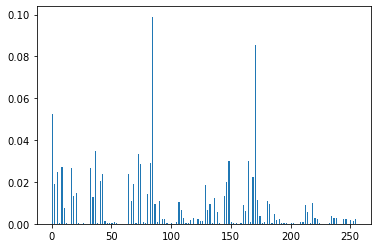

In [4]:

Photo=PIL.Image.open("photo.bmp")
Photo=Photo.resize((512,512))
Photo.show()
PhotoConverted=Photo.convert(mode="1",dither=PIL.Image.FLOYDSTEINBERG)
PhotoConverted.show()
a = np.asarray(PhotoConverted)


Raw=[]
c=0
d=0
for x in range(512):
    for y in range(512):
        c+=1
        d+=int(a[[x],[y]])
        if c != 8:
                d=d<<1
        if c == 8:
            c=0
            #print(d)
            Raw.append(d)
            d=0
#print("koniec petli")

#print(Raw)
n, bins, patches = plt.hist(Raw,bins=255,range=[0,255],density=True)
print(esp(n,base=2))





In [5]:


p=1
q=1
A=np.array([[1,p],[q,((p*q)+1)]])
PhotoInPost=np.array(a)
PhotoAfterPost=np.array(PhotoInPost)

for i in range(10):
    for x in range(512):
        for y in range(512):
            temp=np.array([[x],[y]])
            b=(A @ temp)
            b[[0],[0]]=math.fmod(b[[0],[0]], 512)
            b[[1],[0]]=math.fmod(b[[1],[0]], 512)
            PhotoAfterPost[[b[[0],[0]]],[b[[1],[0]]]]=PhotoInPost[[x],[y]]
    PhotoInPost=PhotoAfterPost       
#PhotoAfterPost=Photo.convert(mode="1")
#print(PhotoAfterPost)        

DisplayImg=PIL.Image.fromarray(PhotoAfterPost,mode="1")
DisplayImg.show()



    


Ilość cyfr: 37449
6.627723330452993


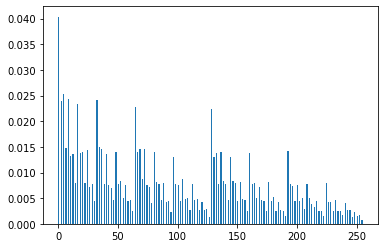

In [6]:



Data=[]
c=0
d=0
for x in range(512):
    for y in range(512):
        c+=1
        d+=int(PhotoAfterPost[[x],[y]])
        if c != 8:
                d=d<<1
        if c == 8:
            c=0
            #print(str(d)+'\n')
            Data.append(d)
            d=0

#print(Data)
DataToSave=np.array(Data)
output_file = open('file.bin', 'wb')
DataToSave.tofile(output_file)
output_file.close()

print("Ilość cyfr:",len(Data))


figImage , his = plt.subplots()
bins=255

n, bins, patches = plt.hist(Data,bins=255,range=[0,255],density=True)
print(esp(n,base=2))



Ilość cyfr: 98304
Surowe Dane ze źródła przed postprocesingiem:
6.084530736314808
Dane po całym procesie
7.95840439765469


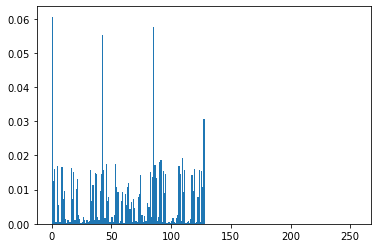

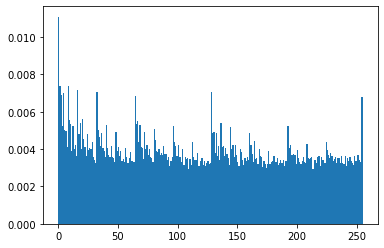

In [17]:
###100 000 numbers generator
Data=[]
Raw=[]
for counter in range(3):
    PhotoName=("photo",str(counter),".bmp.")
    PhotoName="".join(PhotoName)
    Photo=PIL.Image.open(PhotoName)
    Photo=Photo.resize((512,512))
    #Photo.show()
    PhotoConverted=Photo.convert(mode="1",dither=PIL.Image.FLOYDSTEINBERG)
    #PhotoConverted.show()
    a = np.asarray(PhotoConverted)


  
    c=0
    d=0
    for x in range(512):
        for y in range(512):
            c+=1
            d+=int(a[[x],[y]])
            if c != 8:
                d=d<<1
            if c == 8:
                c=0
                #print(d)
                Raw.append(d)
                d=0




    p=2
    q=2
    A=np.array([[1,p],[q,((p*q)+1)]])
    PhotoInPost=np.array(a)
    PhotoAfterPost=np.array(PhotoInPost)

    for i in range(7):
        for x in range(512):
            for y in range(512):
                temp=np.array([[x],[y]])
                b=A.dot(temp)
                b[[0],[0]]=(b[[0],[0]] % 512)
                b[[1],[0]]=(b[[1],[0]] % 512)
                PhotoAfterPost[[b[[0],[0]]],[b[[1],[0]]]]=PhotoInPost[[x],[y]]
        PhotoInPost=PhotoAfterPost       
    #PhotoAfterPost=Photo.convert(mode="1")
    #print(PhotoAfterPost)        

    DisplayImg=PIL.Image.fromarray(PhotoAfterPost,mode="1")
    #DisplayImg.show()



    
    c=0
    d=0
    for x in range(512):
        for y in range(512):
            c+=1
            d+=int(PhotoAfterPost[[x],[y]])
            if c != 8:
                d=d<<1
            if c == 8:
                c=0
                #print(str(d)+'\n')
                Data.append(d)
                d=0

#print(Data)
DataToSave=np.array(Data)
output_file = open('file.bin', 'wb')
DataToSave.tofile(output_file)
output_file.close()

print("Ilość cyfr:",len(Data))
print("Surowe Dane ze źródła przed postprocesingiem:")
figImage , his = plt.subplots()
bins=255

ProbRaw, bins, patches = plt.hist(Raw,bins=255,range=[0,255],density=True)
print(esp(ProbRaw,base=2))


print("Dane po całym procesie")


figImage , his = plt.subplots()





ProbDat, bins, patches = plt.hist(Data,bins=255,range=[0,255],density=True)
print(esp(ProbDat,base=2))

